In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation and validation libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import StandardScaler

# Classifier libraries
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df['quality'] = np.where(df['quality'] >= 7, 1, 0)

### Preprocessing

In [4]:
X_train, X_test = train_test_split(df, test_size=0.20, random_state=42)
print("Train size: ", X_train.shape)
print("Test size: ", X_test.shape)

Train size:  (1279, 12)
Test size:  (320, 12)


In [5]:
def oversample_dataset(data):
    X = data.drop(columns={'quality'})
    y = data['quality']
    
    sm = SMOTE(random_state=42)
    
    X_sm, y_sm = sm.fit_resample(X, y)
    sm_df = pd.concat([X_sm, y_sm], axis=1)
    
    return sm_df

X_train_sm = oversample_dataset(X_train)

In [6]:
y_train = X_train_sm['quality']
y_test = X_test['quality']
X_train = X_train_sm.drop(columns={'quality'})
X_test = X_test.drop(columns={'quality'})

print("Train size: ", X_train.shape)
print("Test size: ", X_test.shape)

Train size:  (2218, 11)
Test size:  (320, 11)


In [7]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

### Model

<AxesSubplot:title={'center':'Penalties vs Precision'}, xlabel='Penalties', ylabel='Precision'>

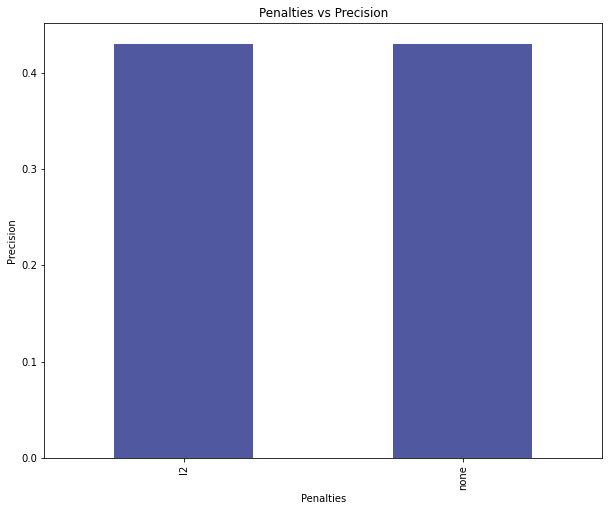

In [11]:
scores = []
penalty_score = []

penalties = ['l2', 'none']

for i in penalties:    
    model = LogisticRegression(penalty=i)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    score = precision_score(y_test, y_pred)
    scores.append(score)
    penalty_score.append([i, score])
    
plt.figure(figsize=(10,8))
plt.title("Penalties vs Precision")
plt.xlabel("Penalties")
plt.ylabel("Precision")
pd.Series(scores, penalties).plot(kind='bar', color='#50589F')

In [12]:
id_penalty = pd.DataFrame(penalty_score, columns=['feature', 'score'])['score'].idxmax()
penalty = pd.DataFrame(penalty_score, columns=['feature', 'score'])['feature'][id_penalty]
print("penalty:", penalty)

penalty: l2


In [13]:
def logistic_regression_features(X_train, X_test, y_train, y_test):

    penalty_score = []

    penalties = ['l2', 'none']

    for i in penalties:    
        model = LogisticRegression(penalty=i)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        score = precision_score(y_test, y_pred)
        penalty_score.append([i, score])

        
    id_penalty = pd.DataFrame(penalty_score, columns=['feature', 'score'])['score'].idxmax()
    penalty = pd.DataFrame(penalty_score, columns=['feature', 'score'])['feature'][id_penalty]
    
    response = {
        "penalty": penalty
    }
        
    return response

In [14]:
logistic_regression_features(X_train_scaled, X_test_scaled, y_train, y_test)

{'penalty': 'l2'}